# Pandas DataFrame as a Backtrader Data Feed

In [1]:
%matplotlib inline

import backtrader as bt
from matplotlib import pyplot as plt
from utils import read_bars

In [2]:
time_bars = read_bars('/data/bars/TimeBar/60000/TimeBar.60000.Binance.Swap.BTC_USDT.csv')  # 1-minute TimeBar

In [3]:
time_bars.head()

,exchange,market_type,pair,bar_type,bar_size,timestamp,timestamp_end,open,high,low,...,volume,volume_sell,volume_buy,volume_quote,volume_quote_sell,volume_quote_buy,count,count_sell,count_buy,vwap
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-01 00:00:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-01 00:00:00+00:00,2020-05-01 00:01:00+00:00,8623.610352,8647.000000,8619.839844,...,336.05900,237.074,98.985,2901211.8,2046791.6,2900974.5,626,385,241,8633.043007
2020-05-01 00:01:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-01 00:01:00+00:00,2020-05-01 00:02:00+00:00,8646.969727,8678.190430,8646.240234,...,468.53500,268.065,200.470,4058401.8,2321972.2,4058133.5,1059,623,436,8661.896763
2020-05-01 00:02:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-01 00:02:00+00:00,2020-05-01 00:03:00+00:00,8659.240234,8661.049805,8631.049805,...,211.19600,61.789,149.407,1826089.0,534133.0,1826027.1,538,222,316,8646.418493
2020-05-01 00:03:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-01 00:03:00+00:00,2020-05-01 00:04:00+00:00,8634.049805,8653.719727,8633.389648,...,193.78000,135.785,57.995,1674965.0,1173657.9,1674829.2,481,295,186,8643.642275
2020-05-01 00:04:00+00:00,Binance,Swap,BTC_USDT,TimeBar,60000,2020-05-01 00:04:00+00:00,2020-05-01 00:05:00+00:00,8645.009766,8656.990234,8635.580078,...,209.26399,69.717,139.547,1809267.0,602910.5,1809197.2,381,218,163,8645.859233


In [4]:
time_bars.columns

Index(['exchange', 'market_type', 'pair', 'bar_type', 'bar_size', 'timestamp',
       'timestamp_end', 'open', 'high', 'low', 'close', 'mean', 'median',
       'volume', 'volume_sell', 'volume_buy', 'volume_quote',
       'volume_quote_sell', 'volume_quote_buy', 'count', 'count_sell',
       'count_buy', 'vwap'],
      dtype='object')

In [5]:
class CryptoPandasData(bt.feeds.PandasData):
    lines = ('mean', 'median', 'volume_sell', 'volume_buy',
             'volume_quote', 'volume_quote_sell', 'volume_quote_buy',
             'count', 'count_sell', 'count_buy')
    params = (
        ('datetime', 'timestamp'),
        ('openinterest',None),
        ('mean', -1),
        ('median', -1),
        ('volume_sell', -1),
        ('volume_buy', -1),
        ('volume_quote', -1),
        ('volume_quote_sell', -1),
        ('volume_quote_buy', -1),
        ('count', -1),
        ('count_sell', -1),
        ('count_buy', -1),
    )

In [6]:
data_feed = CryptoPandasData(dataname=time_bars)

In [15]:
bt.TimeFrame.Names[data_feed._timeframe]

'Days'

In [8]:
data_feed._compression

1

In [9]:
class PrintStrategy(bt.Strategy):
    def __init__(self):
        self.counter = 0
        print('timestamp, open, high, low, close, volume, volume_sell, volume_buy, volume_quote, ' + \
              'volume_sell_quote, volume_buy_quote, count, count_sell, count_buy')
    def next(self):
        self.counter += 1
        if self.counter < 10:
            print(', '.join(str(x) for x in [
                self.data.datetime.datetime(), # self.datetime.datetime(0)
                self.data.open[0],
                self.data.high[0],
                self.data.low[0],
                self.data.close[0],
                self.data.volume[0],
                self.data.volume_sell[0],
                self.data.volume_buy[0],
                self.data.volume_quote[0],
                self.data.volume_quote_sell[0],
                self.data.volume_quote_buy[0],
                self.data.count[0],
                self.data.count_sell[0],
                self.data.count_buy[0],
            ]))

In [10]:
cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.addstrategy(PrintStrategy)
cerebro.adddata(data_feed)
cerebro.run()

timestamp, open, high, low, close, volume, volume_sell, volume_buy, volume_quote, volume_sell_quote, volume_buy_quote, count, count_sell, count_buy
2020-05-01 00:00:00, 8623.6103515625, 8647.0, 8619.83984375, 8646.8603515625, 336.059, 237.074, 98.985, 2901211.8, 2046791.6, 2900974.5, 626.0, 385.0, 241.0
2020-05-01 00:01:00, 8646.9697265625, 8678.1904296875, 8646.240234375, 8658.580078125, 468.535, 268.065, 200.47, 4058401.8, 2321972.2, 4058133.5, 1059.0, 623.0, 436.0
2020-05-01 00:02:00, 8659.240234375, 8661.0498046875, 8631.0498046875, 8633.990234375, 211.196, 61.788999999999994, 149.407, 1826089.0, 534133.0, 1826027.1, 538.0, 222.0, 316.0
2020-05-01 00:03:00, 8634.0498046875, 8653.7197265625, 8633.3896484375, 8645.0, 193.78, 135.785, 57.995, 1674965.0, 1173657.9, 1674829.2, 481.0, 295.0, 186.0
2020-05-01 00:04:00, 8645.009765625, 8656.990234375, 8635.580078125, 8640.650390625, 209.26398999999998, 69.717, 139.547, 1809267.0, 602910.5, 1809197.2, 381.0, 218.0, 163.0
2020-05-01 00:05:00

In [11]:
plt.rcParams['figure.figsize']=(16, 8)

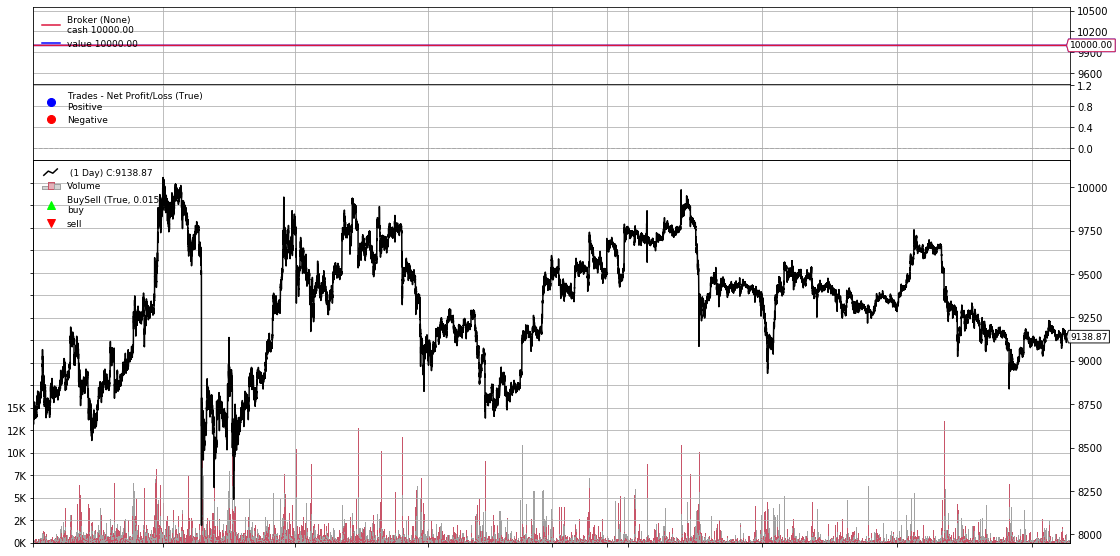

[[<Figure size 1152x576 with 4 Axes>]]

In [12]:
cerebro.plot(iplot=False)

## References

* [How to feed a custom pandas dataframe in backtrader?](https://community.backtrader.com/topic/1828/how-to-feed-a-custom-pandas-dataframe-in-backtrader/2)
* [Struggling to implement custom Pandas data feed](https://community.backtrader.com/topic/1777/struggling-to-implement-custom-pandas-data-feed)